# House Price Prediction - Case Study

# Data Sourcing

**Peforming required python library imports**

In [703]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

**Loading Source Data into Pandas Dataframe**

In [704]:
src_house_price = pd.read_csv("train.csv", encoding = 'utf-8')
src_house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

**Total Columns and Rows**

In [705]:
(rows, columns) = src_house_price.shape
print(f'Number of rows : {rows}')
print(f'Number of columns : {columns}')

Number of rows : 1460
Number of columns : 81


**Checking Table Statistics and Viewing the Table Schema**

In [706]:
print(f'Pandas Dataframe (load_master) Statistics and Schema : \n ')
print(f'Shape : \n\n {src_house_price.shape} \n')
print(f'Schema : \n\n  {src_house_price.dtypes} \n')

Pandas Dataframe (load_master) Statistics and Schema : 
 
Shape : 

 (1460, 81) 

Schema : 

  Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtF

# Data Cleaning

**Checking for empty rows**

In [707]:
src_house_price.isnull().all(axis=1).sum()

0

**Checking nulls for each column**

In [708]:
house_price_nulls = src_house_price.isnull().sum()
print(house_price_nulls)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

**Creating a list of column names who have nulls for all its rows**

In [709]:
null_counts_df = pd.DataFrame({'Column_Name': house_price_nulls.index, 'Null_Count': house_price_nulls.values})
null_counts_df = null_counts_df[(null_counts_df.Null_Count == rows)]
house_price_nulls_list = list(null_counts_df.Column_Name.values)
house_price_nulls_list

[]

**Finding which columns have nulls**

In [710]:
print('Nulls Checks : \n')
src_house_price.columns[src_house_price.isnull().any()] 

null_check = src_house_price.isnull().sum()/len(src_house_price)*100
null_check = null_check[null_check>0]
null_check.sort_values(inplace=True, ascending=False)
null_check

Nulls Checks : 



PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

**The above categorical variables except for few when crosschecked with data dictionary contains nulls**

**Exception Columns having different nature of problem: GarageYrBlt, MasVnrArea, LotFrontage, Electrical**

**Replacing same with None**

In [711]:
null_cols = ["PoolQC", "MiscFeature", "Alley", 
                     "Fence", "FireplaceQu", 
                     "GarageType", "GarageFinish", 
                     "GarageQual", "GarageCond", "BsmtExposure", 
                     "BsmtFinType2", "BsmtFinType1", "BsmtCond",
                     "BsmtQual", "MasVnrType"]
for i in null_cols:
    src_house_price[i].fillna("none", inplace=True)

In [712]:
src_house_price.columns[src_house_price.isnull().any()] 

null_2 = src_house_price.isnull().sum()/len(src_house_price)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

**Columns GarageYrBlt, MasVnrArea, LotFrontage, Electrical cannot be directly replaced with None**

**Column Fixed : GarageYrBlt**

**Count now matches with total rows**

In [713]:
src_house_price["GarageYrBlt"].fillna(src_house_price["GarageYrBlt"].median(), inplace=True)
src_house_price['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

**Column Fixed : MasVnrArea**

**Count now matches with total rows**

In [714]:
src_house_price["MasVnrArea"].fillna(src_house_price["MasVnrArea"].median(), inplace=True)
src_house_price['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

**Column Fixed : LotFrontage**

**Count now matches with total rows**

In [715]:
src_house_price['LotFrontage'] = src_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
src_house_price['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

**Column Fixed : Electrical**

**Count now matches with total rows**

In [716]:
src_house_price["Electrical"].dropna(inplace=True)
src_house_price['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

**Checking for duplicates**

In [717]:
has_duplicates = sum(src_house_price.duplicated(subset = 'Id')) == 0
print(f'Has Duplicates : {has_duplicates}')

Has Duplicates : True


# Exploratory Data Analysis

**Checking Neighborhood-wise sale price**

**Sale Price vs Neighborhood**

Text(0.5, 1.0, 'Sales Price vs Neighbourhood')

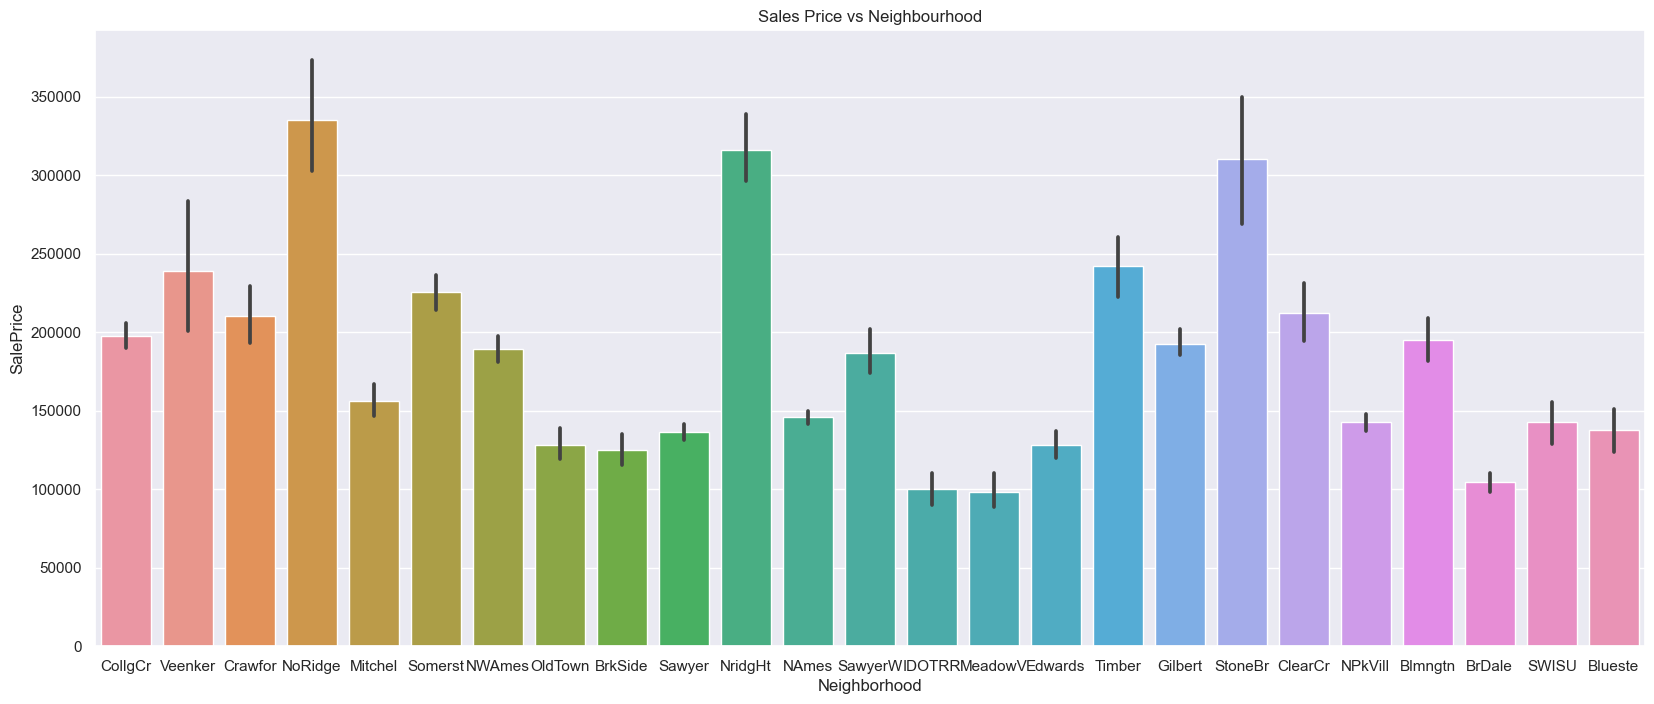

In [718]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=src_house_price)
plt.title("Sales Price vs Neighbourhood")

**Checking Overall Condition of the house**

**Sale Price vs Condition**

Text(0.5, 1.0, 'Sales Price vs Overall Condition')

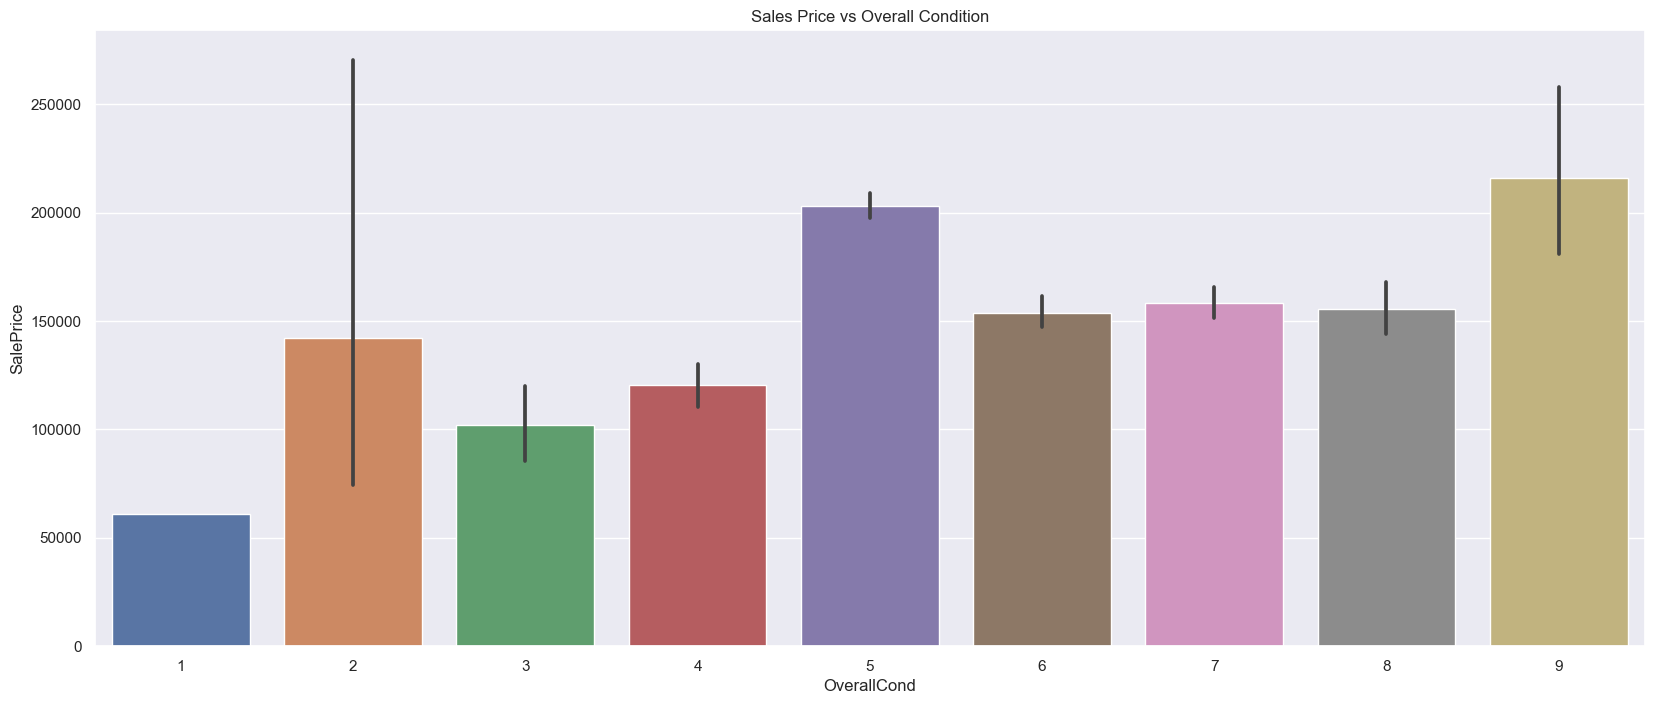

In [719]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= src_house_price)
plt.title("Sales Price vs Overall Condition")

**Checking SalePrice on a Distribution Plot**

<Axes: xlabel='SalePrice', ylabel='Density'>

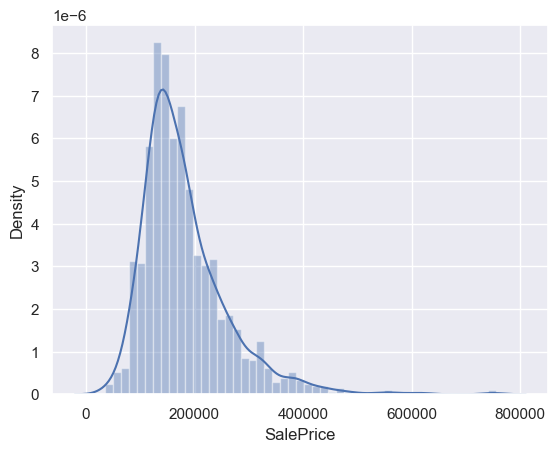

In [720]:
sns.distplot(src_house_price['SalePrice'])

**Applying Log transformation to keep SalePrice in center of distribution plot, as currently it is skewed towards left**

<Axes: xlabel='SalePrice', ylabel='Density'>

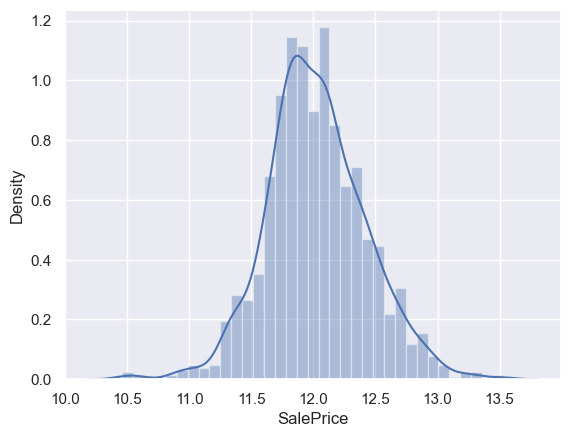

In [721]:
src_house_price['SalePrice']=np.log1p(src_house_price['SalePrice'])
sns.distplot(src_house_price['SalePrice'])

**Selecting Numerical Variables to Create a Correlation Matrix**

In [722]:
src_house_price_nums = src_house_price.select_dtypes(include=['float64', 'int64'])
src_house_price_nums = src_house_price_nums.drop(['Id'], axis=1)
src_house_price_nums.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0  12.247699  
1  12.109016  
2  12.317171  
3  11.849405  
4  12.429220

**Creating Correlation Matrix**

In [723]:
corr_matrix = src_house_price_nums.corr()
corr_matrix

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.073959     0.353288  0.257320     0.817185    -0.036868   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

**Plotting Correlation on HeatMap**

**We can see that Columns : SalePrice, GrLivArea, GarageCars, BsmtUnfSF, BsmtFinSF1, GarageArea, TotalBsmtSF, YearBuilt, TotRmsAbvGrd and GarageYrBlt are correlated**

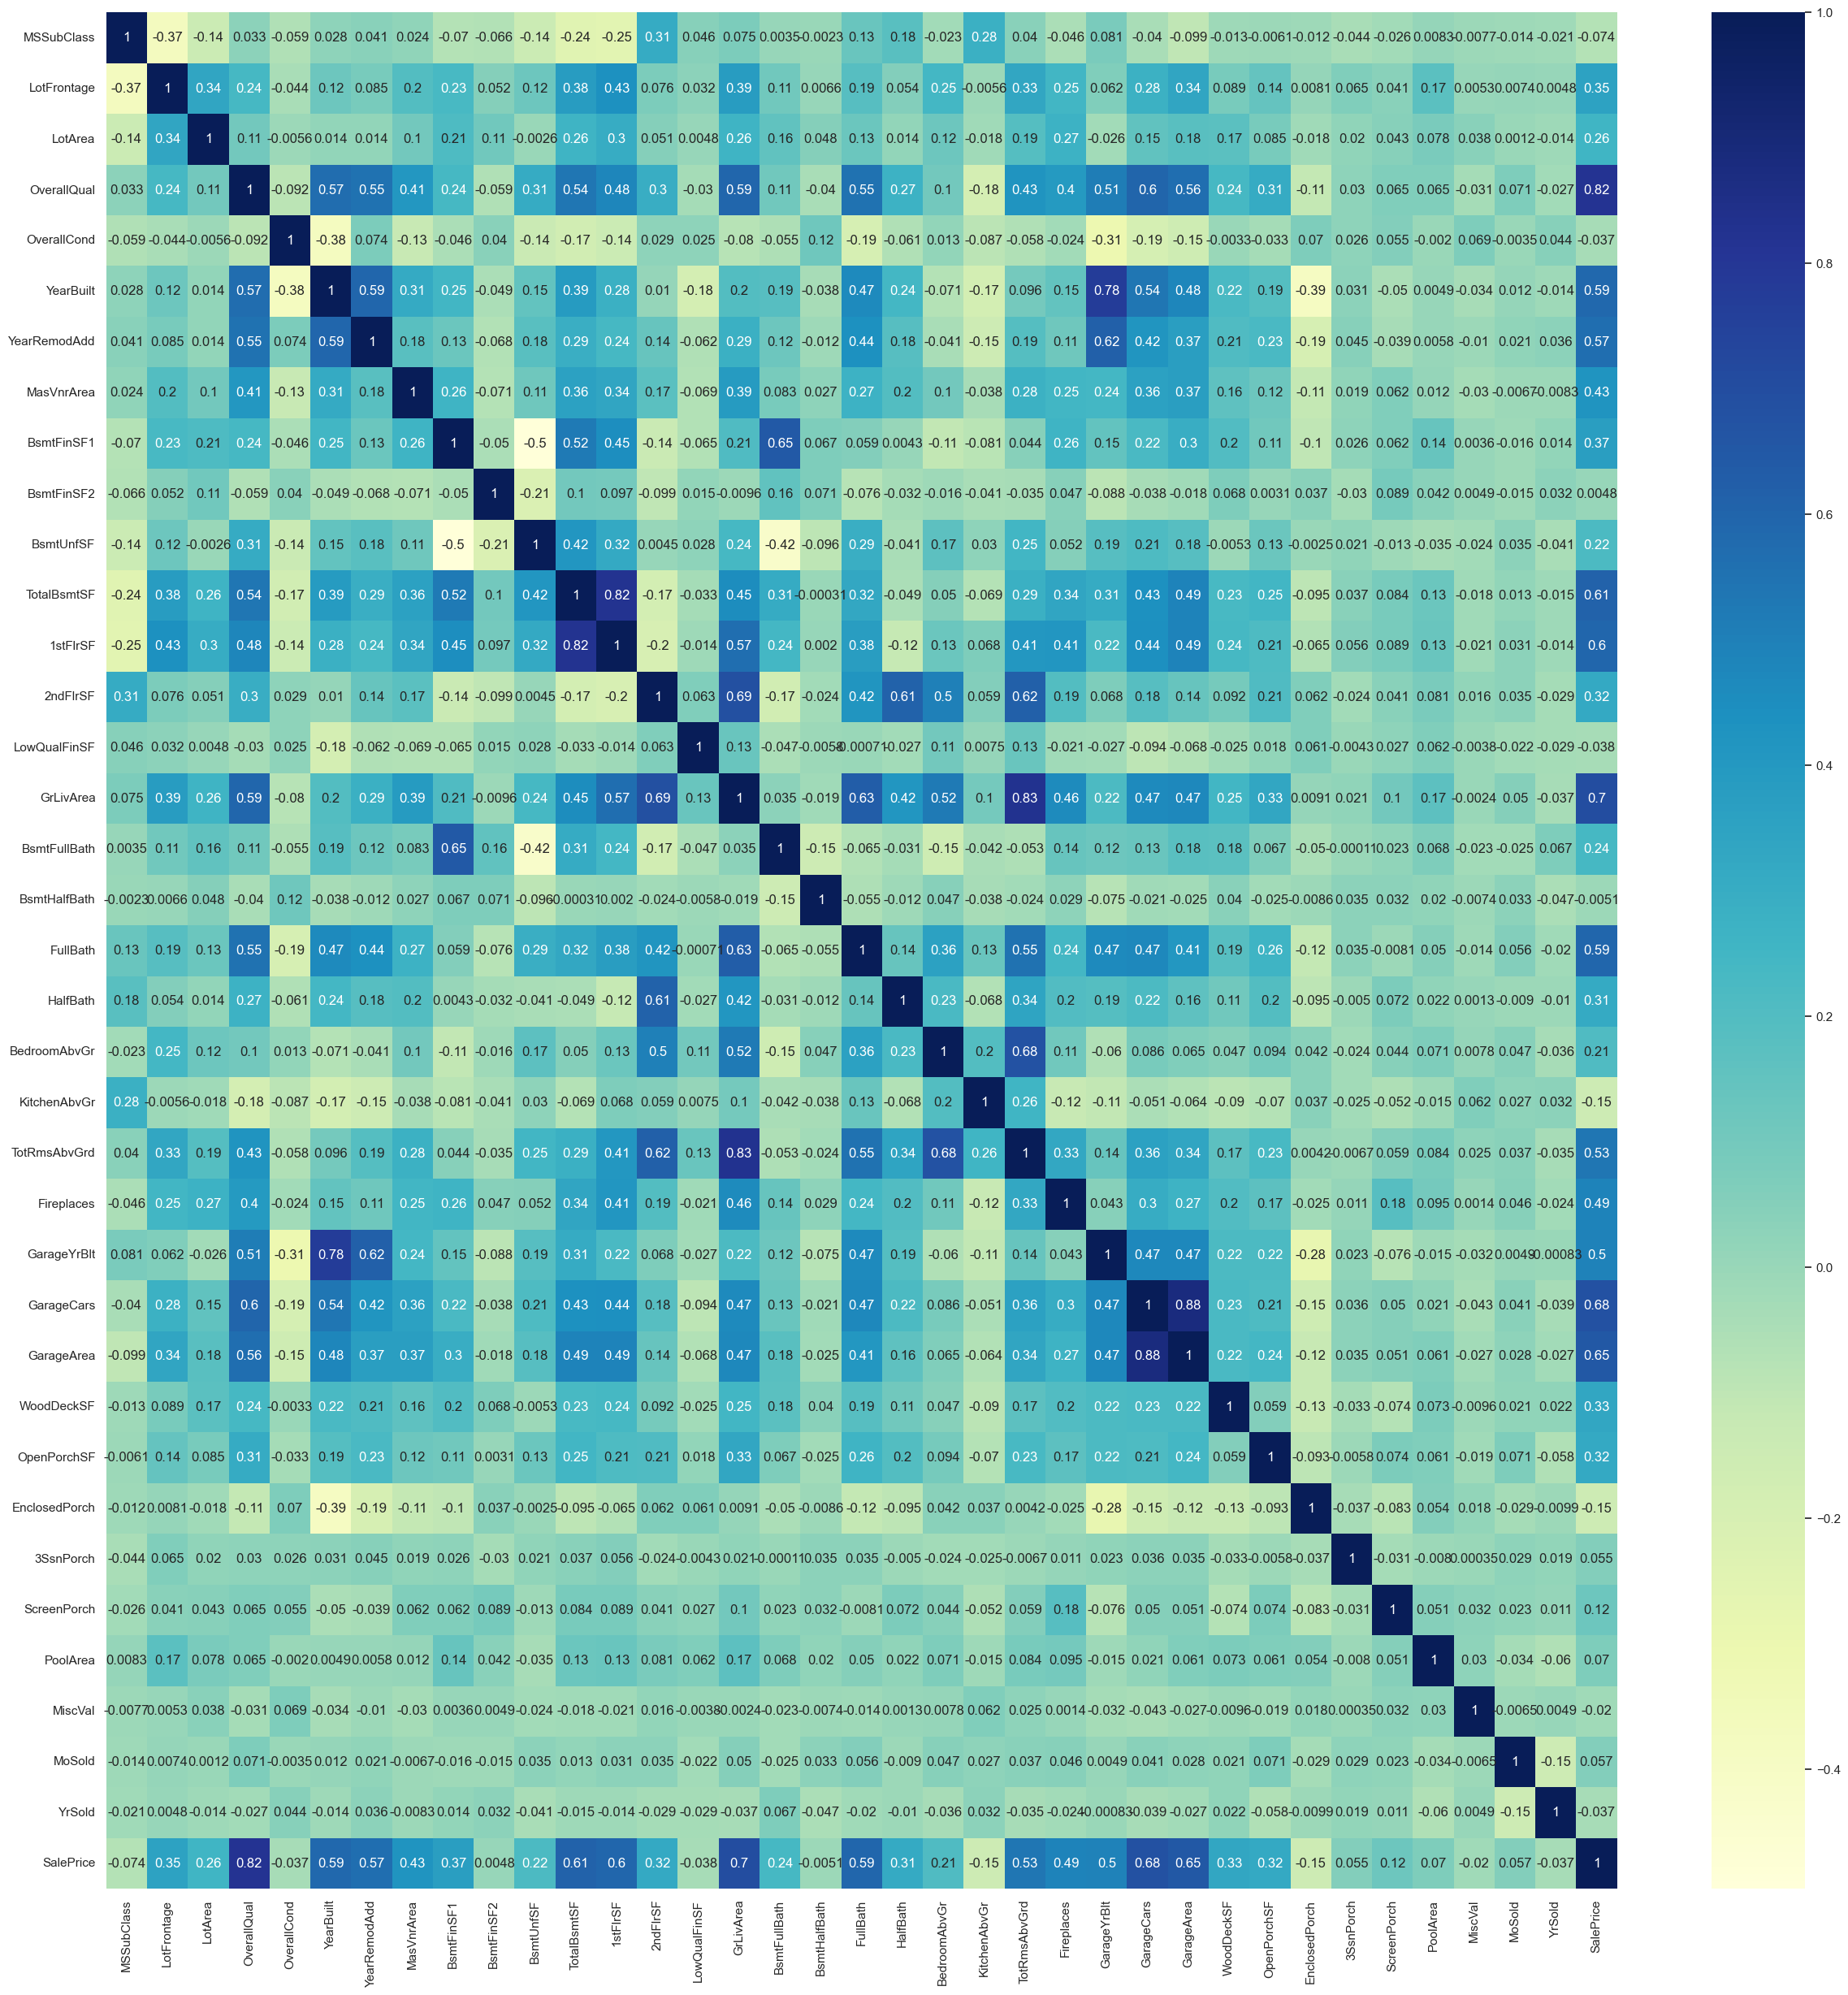

In [724]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Checking there predictive power on pairplot**

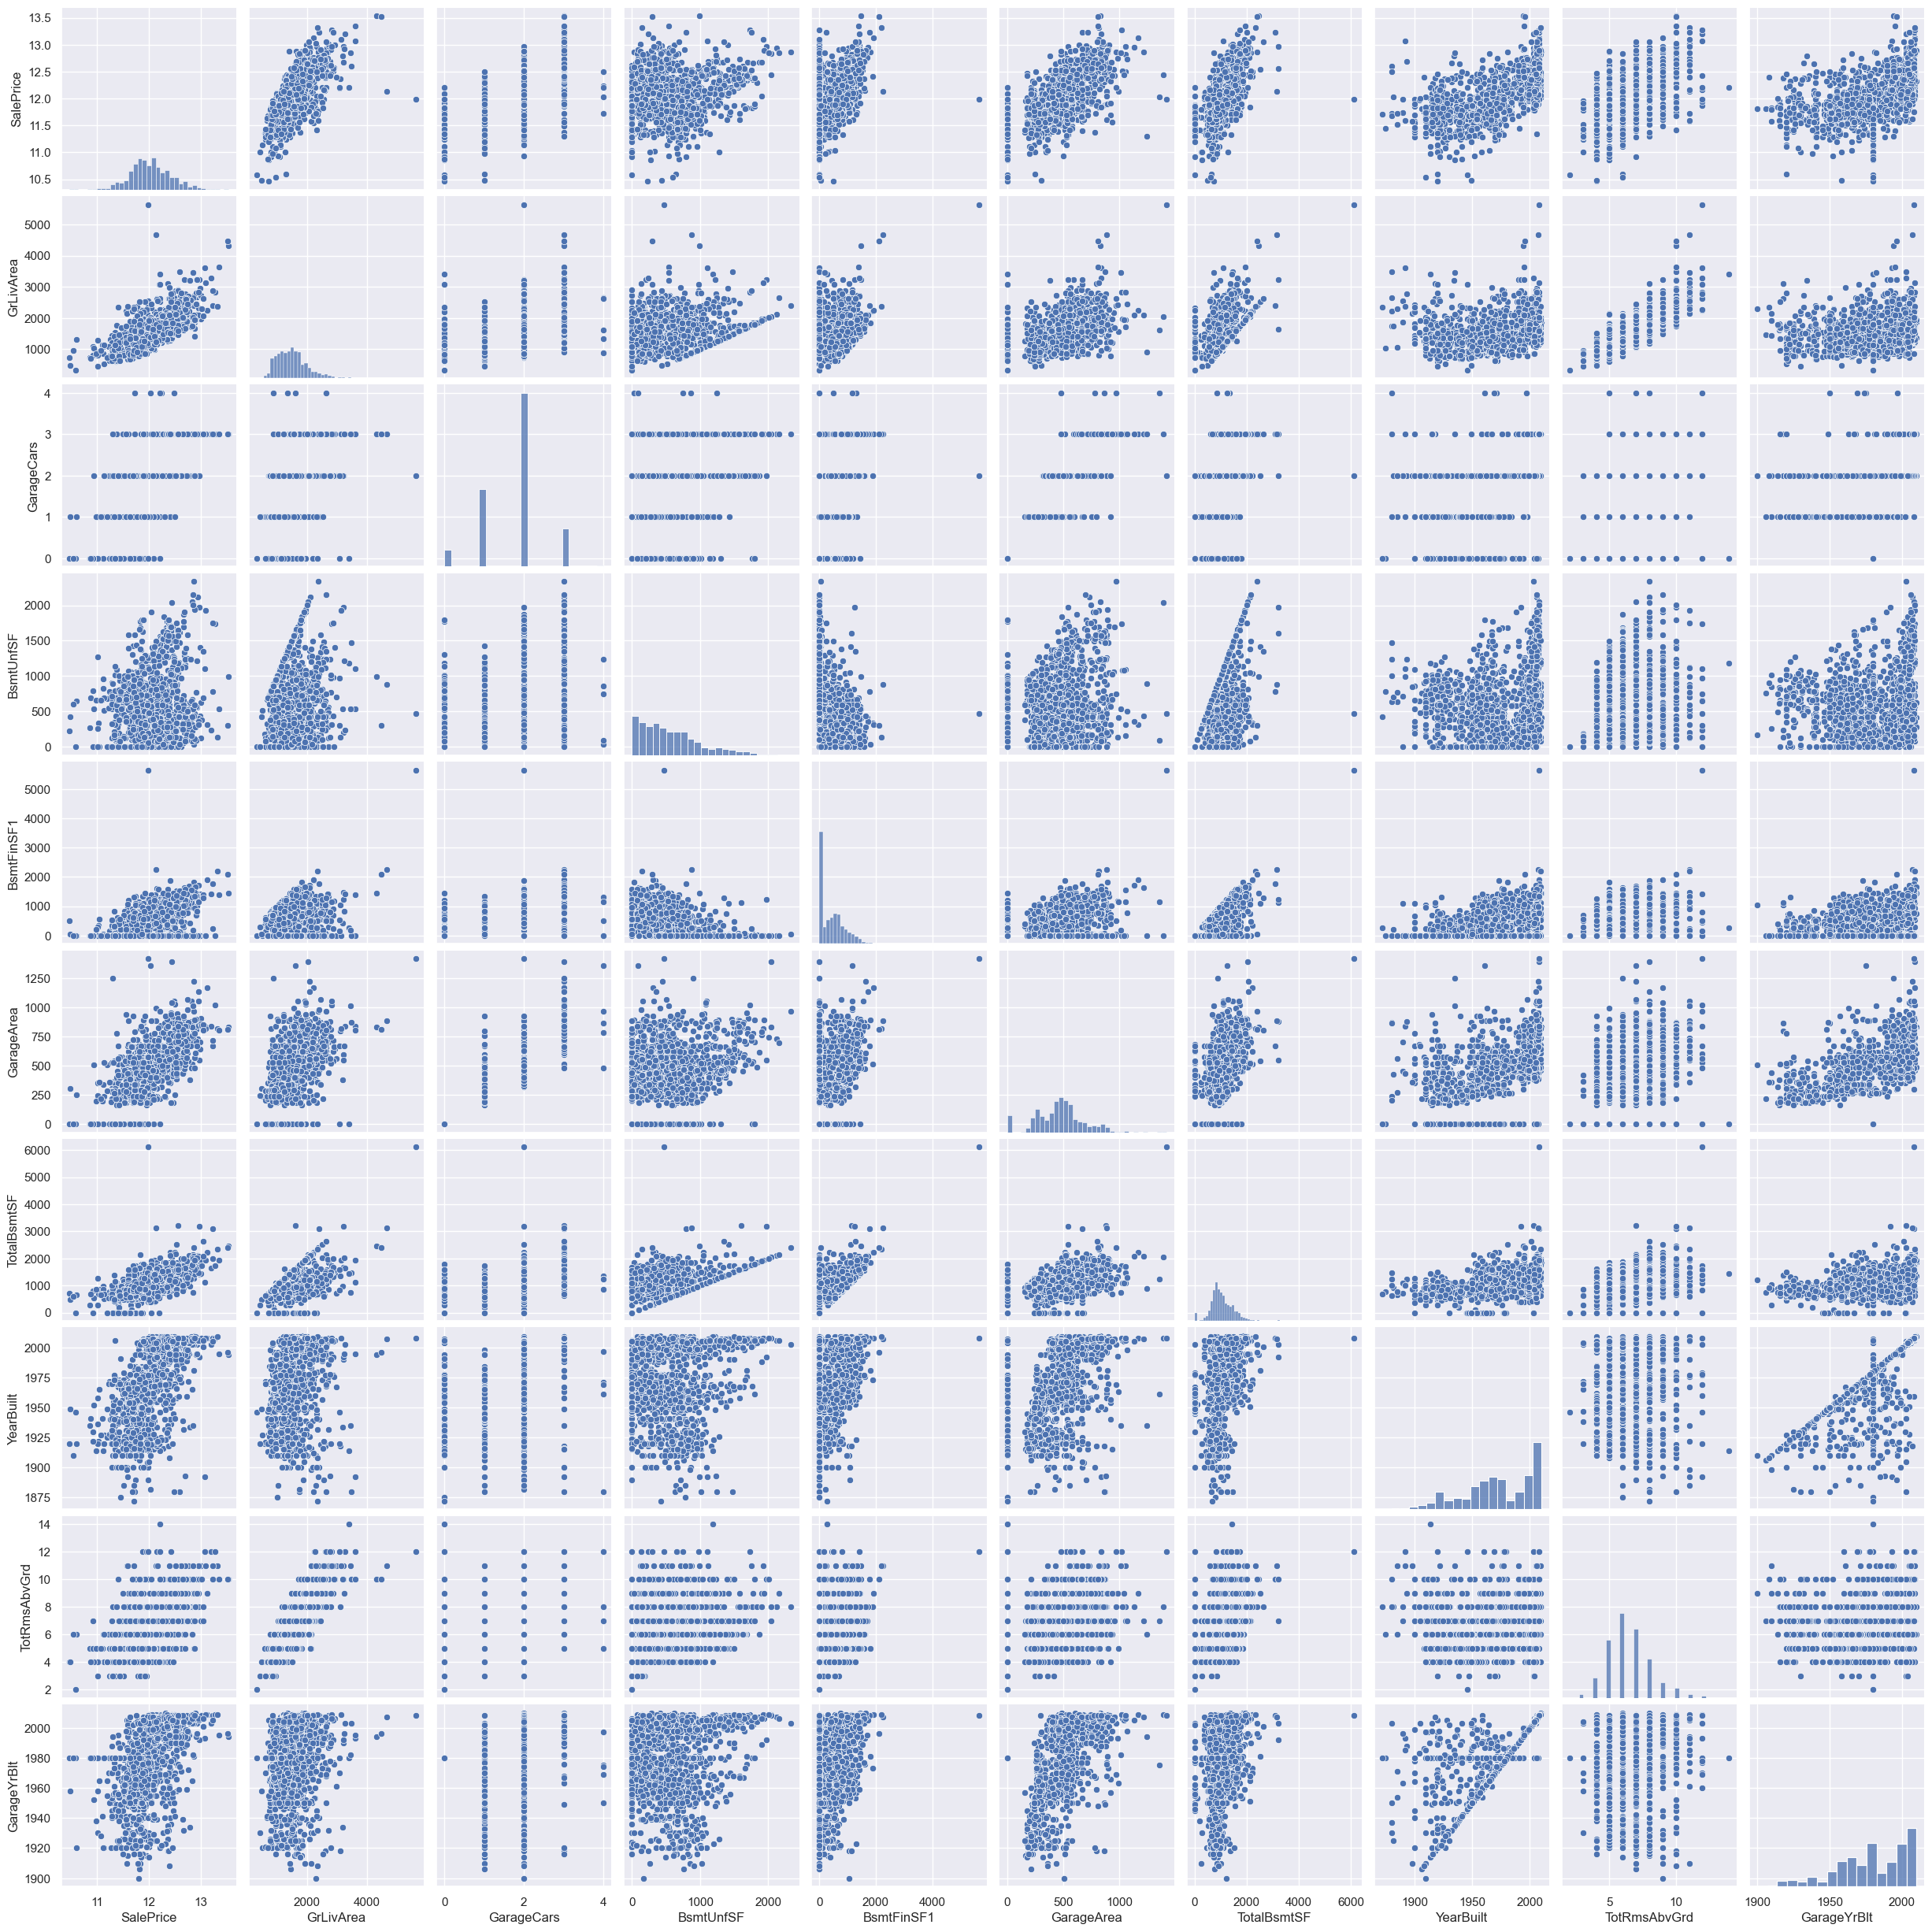

In [725]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(src_house_price[cols], size = 2.5)
plt.show()

**Droping the cols which are not contributing towards SalePrice**

In [726]:
src_house_price = src_house_price.drop(['GarageCars',
                                        'BsmtUnfSF',
                                        'TotRmsAbvGrd',
                                        'GarageYrBlt'], axis = 1)

src_house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

**Checking GrLiveArea vs SalePrice on Joint Plot**

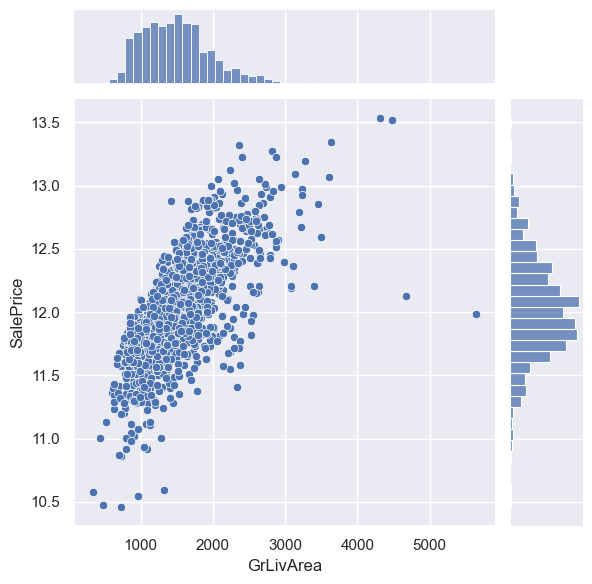

In [727]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=src_house_price)
plt.show()

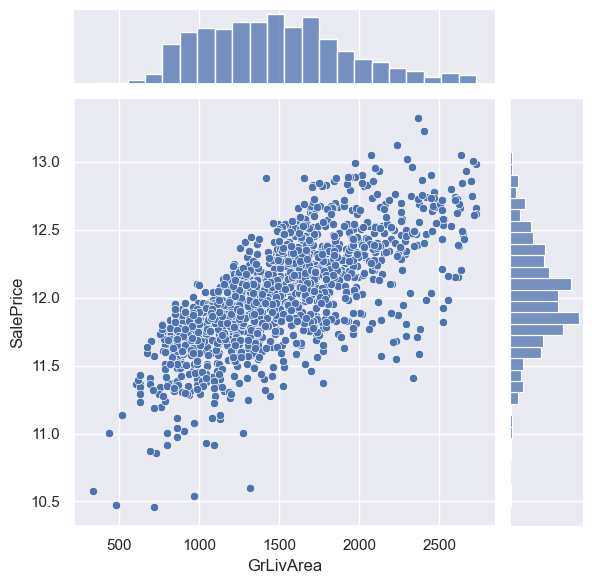

In [728]:
q1 = src_house_price['GrLivArea'].quantile(0.25)
q3 = src_house_price['GrLivArea'].quantile(0.75)
value = q3-q1
lower_value  = q1-1.5*value
higer_value = q3+1.5*value
src_house_price= src_house_price[(src_house_price['GrLivArea']<higer_value) & (src_house_price['GrLivArea']>lower_value)]
sns.jointplot(x = src_house_price['GrLivArea'], y = src_house_price['SalePrice'])
plt.show()

**Checking LotFrontage vs SalePrice on Joint Plot**

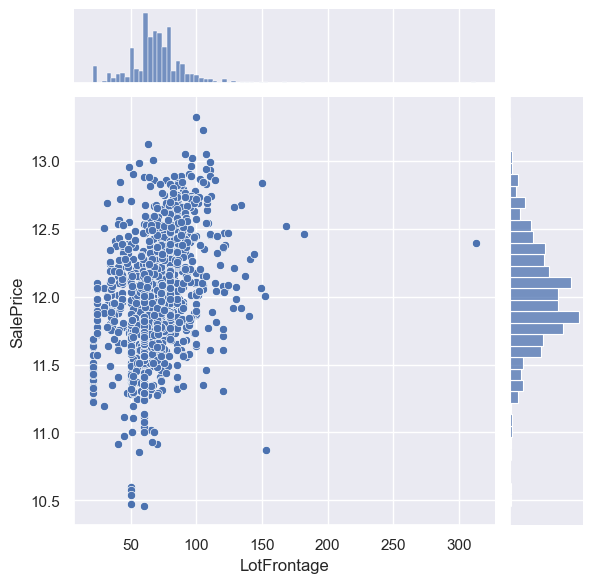

In [729]:
sns.jointplot(x = src_house_price['LotFrontage'], y = src_house_price['SalePrice'])
plt.show()

**Checking LotArea vs SalePrice on Joint Plot**

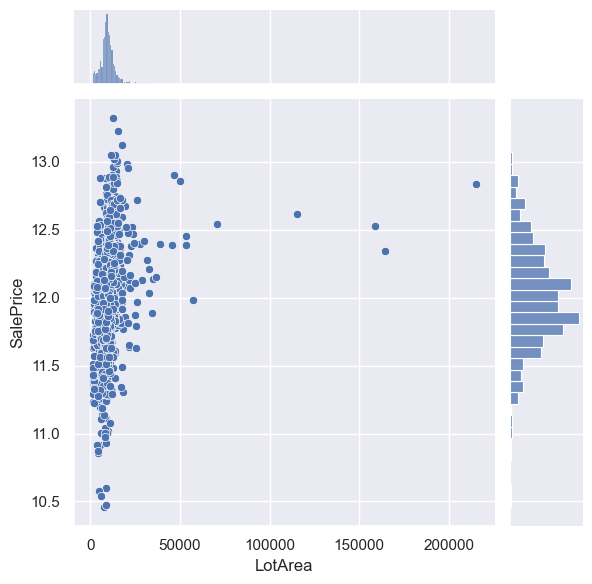

In [730]:
sns.jointplot(x = src_house_price['LotArea'], y = src_house_price['SalePrice'])
plt.show()

**Checking 1stFlrSF vs SalePrice on Joint Plot**

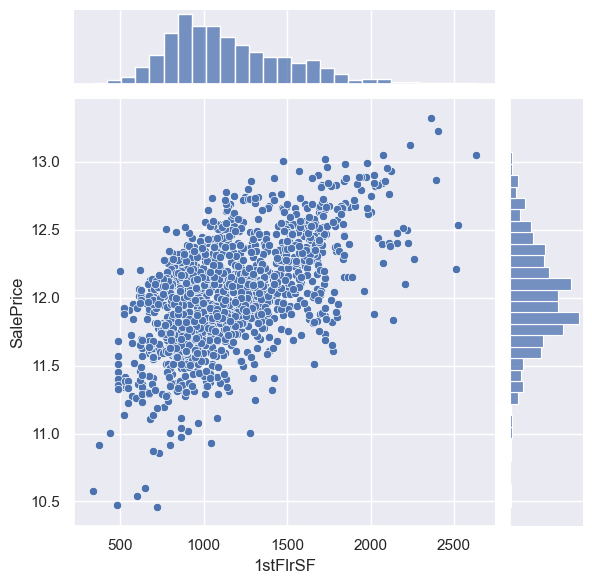

In [731]:
sns.jointplot(x = src_house_price['1stFlrSF'], y = src_house_price['SalePrice'])
plt.show()

**Checking 2ndFlrSF vs SalePrice on Joint Plot**

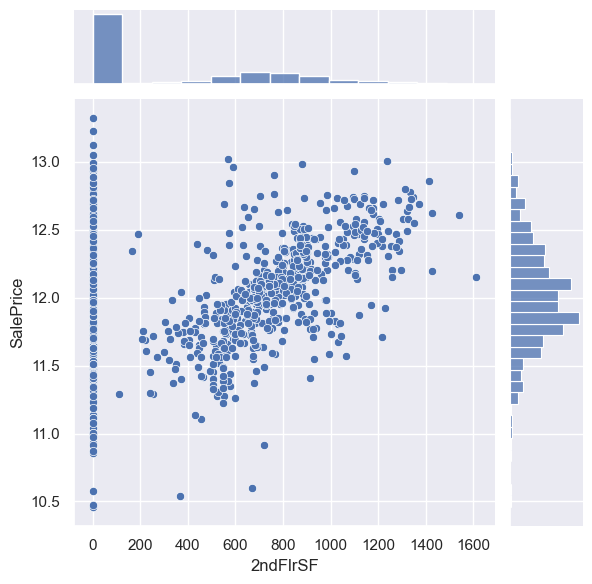

In [732]:
sns.jointplot(x = src_house_price['2ndFlrSF'], y = src_house_price['SalePrice'])
plt.show()

**Checking OverallQual vs SalePrice on Joint Plot**

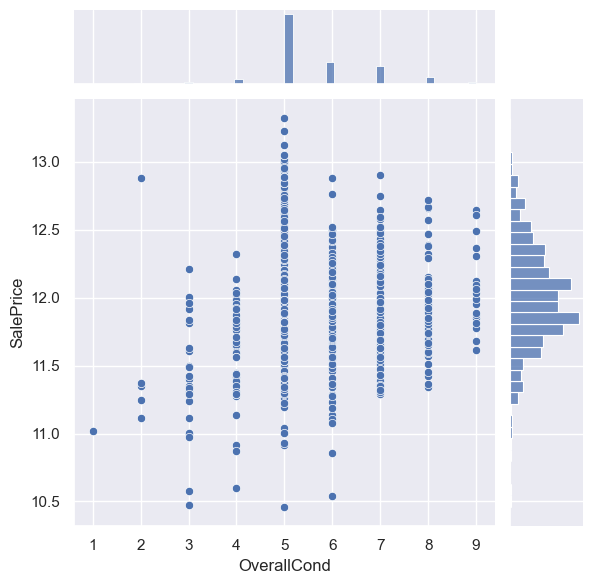

In [733]:
# OverallCond vs SalePrice
sns.jointplot(x=src_house_price['OverallCond'], y = src_house_price['SalePrice'])
plt.show()

**Deriving Column PropAge (Property Age) out of YrSold (Year Sold) and YearBuilt**

In [734]:
src_house_price['PropAge'] = (src_house_price['YrSold'] - src_house_price['YearBuilt'])
src_house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

**Checking SalePrice vs PropAge on Joint Plot**

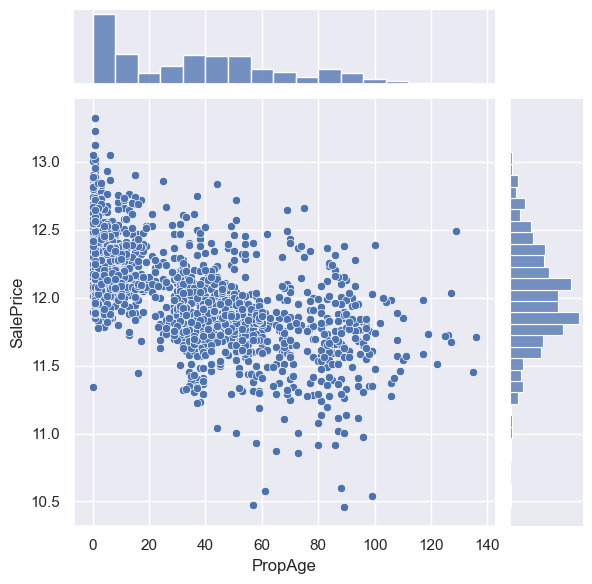

In [735]:
sns.jointplot(x = src_house_price['PropAge'], y = src_house_price['SalePrice'])
plt.show()

**Since derived column PropAge is able to tell us about high price with newer prooerty and vice versa.**

**We donot need columns MoSold,YrSold, YearBuilt, YearRemodAdd**

In [736]:
src_house_price = src_house_price.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'], axis = 1)
src_house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        none     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA   

In [737]:
print(f'Column : Street')
print(src_house_price['Street'].value_counts())
print('\n')
print(f'Column : Utilities')
print(src_house_price['Utilities'].value_counts())

Column : Street
Pave    1423
Grvl       6
Name: Street, dtype: int64


Column : Utilities
AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64


**We can drop the above two columns Street and Utilities as they have low variance and can negatively influence the prediction**

In [738]:
src_house_price = src_house_price.drop(['Street','Utilities'], axis = 1)
src_house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1          60       RL         65.0     8450  none      Reg         Lvl   
1   2          20       RL         80.0     9600  none      Reg         Lvl   
2   3          60       RL         68.0    11250  none      IR1         Lvl   
3   4          70       RL         60.0     9550  none      IR1         Lvl   
4   5          60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF  \
0           No          GLQ         706          Unf           0          856   
1           Gd          ALQ         978          Unf           0         1262   
2           Mn          GLQ         486          Unf           0          920   
3           No          ALQ         216          Unf           0          756   
4           Av          GLQ         655          Unf           0         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ           1          TA     Attchd   

  GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0          RFn         548         TA         TA          Y           0   
1          RFn         460         TA         TA          Y         298   
2          RFn      

**Checking Variance for other Numerical Variables**

In [739]:
out = src_house_price.select_dtypes(include=['float64', 'int64'])
for i in out:
    print(src_house_price[i].value_counts())

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
108.0      8
180.0      

In [740]:
list(src_house_price.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'Sale

**Numerical Columns having low variance**
**Droping the same**

In [741]:
drop_cols  = ['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional']
src_house_price = src_house_price.drop(drop_cols, axis = 1)

# Data Preparation

In [742]:
src_house_price = src_house_price.drop(['Id'], axis=1)
src_house_price.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng     Wd Shng       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC CentralAir  \
0         706          Unf           0          856        Ex          Y   
1         978          Unf           0         1262        Ex          Y   
2         486          Unf           0          920        Ex          Y   
3         216          Unf           0          756        Gd          Y   
4         655          Unf           0         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual  \
0           0        none     Attchd          RFn         548         TA   
1           1          TA     Attchd          RFn         460         TA   
2           1          TA     Attchd          RFn         608         TA   
3           1          Gd     Detchd          Unf         642         TA   
4           1          TA     Attchd          RFn         836         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   
3  

In [743]:
variable_types = src_house_price.dtypes
pd.DataFrame(variable_types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

**List of Numerical Variables**

In [744]:
numerical = variable_types[(variable_types == 'int64') | (variable_types == float)] 
numerical = list(numerical.index)
print(numerical)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


**List of Categorical Variables**

In [745]:
categorical = variable_types[variable_types == object]
categorical = list(categorical.index)
print(categorical)  

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


**Converting Categorical Variable to Numerical for Creating Dummy variables**

In [746]:
house_price = pd.get_dummies(src_house_price, drop_first=True )
house_price.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  PropAge  \
0              0          0            0         0  12.247699        5   
1              0          0            0         0  12.109016       31   
2              0          0            0         0  12.317171        7   
3            272          0            0         0  11.849405       91   
4              0          0            0         0  12.429220        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighb

**Preparing Input (x) Variable**

In [747]:
X = house_price.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PropAge  MSZoning_FV  \
0              0          0            0         0        5            0   
1              0          0            0         0       31            0   
2              0          0            0         0        7            0   
3            272          0            0         0       91            0   
4              0          0            0         0        8            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   
3            0            1            0             0             0   
4            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                  

**Preparing Response (y) variable**

In [748]:
y = house_price['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

**Splitting data into Train and Test**

In [749]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=50)

In [750]:
scaler = StandardScaler()

x_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(x_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

x_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(x_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [751]:
x_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11      1.323938   -0.300737     0.345478  0.113320  1.995226     -0.111211   
1070    0.360916   -0.300737     0.030191 -0.267693 -0.769750     -0.111211   
513    -0.223442   -0.300737     0.119563 -0.176705 -0.769750     -0.111211   
467    -0.106571   -0.300737    -0.764234 -0.722635  1.060654     -0.111211   
993    -1.008820   -0.300737    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11     1.923409      1.131973     -0.250936  2.754667 -0.727119      1.478865   
1070  -0.932170      1.131973     -0.250936 -0.990631 -0.727119      0.212713   
513   -0.860557     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
467    0.401627     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
993    0.079368     -0.816345     -0.250936  0.882018  1.275964      0.212713   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
11       -0.222797    2.231812    1.267298    0.485675    -0.351334   
1070     -0.222797   -0.918240   -0.857140   -0.758474    -0.368801   
513      -0.222797   -0.918240    0.077613    0.257158    -0.718144   
467      -0.222797    2.231812   -0.734395    0.663411    -0.718144   
993      -0.222797   -0.918240    0.455291   -0.758474    -0.106794   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  MSZoning_FV  \
11        -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   
1070      -0.378185  -0.115383     3.351363 -0.054574  0.445587            0   
513        2.265177  -0.115383    -0.268919 -0.054574 -0.447904            0   
467       -0.378185  -0.115383    -0.268919 -0.054574  0.908879            0   
993       -0.378185  -0.115383    -0.268919 -0.054574 -1.209026            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
11              0            1            0             0             0   
1070            0            1            0             0             0   
513             0            1            0             0             0   
467             0            1            0             0             0   
993             0            1            0             0             0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
11               0                0                0                1   
1070             1                0                0                1   
513              1                0                0                0   
467              1                0                0                1   
993              1                0                0                1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
11                    0              0              0                 1   
1070                  0              0              0                 1   
513                   0              0              0                 0   
467                   0              0              0                 1   
993                   0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
11                0              0                     0                    0   
1070              0              0                     0                    0   
513               0              0                     0         

In [752]:
x_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  0.506037   
335    -0.606456    1.881258    0.620602     1.075768  1.258064 -0.435654   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718 -0.835813   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  0.848688   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541 -0.835813   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
461       -0.09698  -0.813247      1.073876     -0.215271 -1.099305 -0.803081   
335       -0.09698   0.616745      2.969732     -0.215271  0.802316 -0.803081   
200       -0.09698  -0.843999     -0.821980     -0.215271  0.802316 -0.803081   
214       -0.09698  -0.248718     -0.821980     -0.215271 -1.099305  1.176929   
1003      -0.09698   0.383905     -0.821980     -0.215271  0.802316 -0.803081   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
461       0.172438     -0.185172   -0.988037    0.530538    1.165362   
335       0.172438     -0.185172    2.151725    0.299231    4.227488   
200      -1.081391     -0.185172   -0.988037   -0.138775    0.248203   
214       0.172438     -0.185172   -0.988037   -0.832694   -0.728127   
1003      1.426267      4.779760   -0.988037    0.294310   -0.728127   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  \
461     -0.747921      -0.328244  -0.127886     -0.27671       0.0  1.326790   
335     -0.747921      -0.328244  -0.127886     -0.27671       0.0  0.303675   
200      0.135073      -0.328244  -0.127886     -0.27671       0.0 -0.924063   
214     -0.251236      -0.328244  -0.127886     -0.27671       0.0 -0.037363   
1003    -0.747921      -0.328244  -0.127886     -0.27671       0.0 -0.105571   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
461             0            0            1            0             0   
335             0            0            1            0             0   
200             0            0            0            1             0   
214             0            0            1            0             0   
1003            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
461              0             1                0                0   
335              0             0                1                0   
200              0             1                0                0   
214              0             0                0                0   
1003             0             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
461                 1                  0              0              0   
335                 0                  0              0              0   
200                 1                  0              0              0   
214                 1                  0              1              0   
1003                1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
461                  1              0              0                     0   
335                  0              0              1                     0   
200                  0              0              0                     0   
214                  0              0              0                     0   
1003                

In [753]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Testing out with Linear Regression and RFE

In [754]:
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(estimator = lm, n_features_to_select = 100)            
rfe = rfe.fit(x_train, y_train)

In [755]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 63),
 ('LotFrontage', False, 82),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 97),
 ('BsmtFinSF1', False, 69),
 ('BsmtFinSF2', False, 85),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 35),
 ('BsmtHalfBath', False, 107),
 ('FullBath', False, 74),
 ('HalfBath', False, 57),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 102),
 ('Fireplaces', False, 103),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 110),
 ('EnclosedPorch', False, 53),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 49),
 ('PoolArea', False, 72),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 93),
 ('LotShape_IR3', False, 89),
 ('LotShape_Reg', False, 106),
 ('LandContour_HLS', False, 54

In [756]:
col = x_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_

In [757]:
x_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'GarageFinish_Unf', 'GarageQual_Gd', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=110)

In [758]:
x_train_rfe = x_train[col]
x_train_rfe = pd.DataFrame(x_train[col])

In [759]:
x_train_rfe.head()

LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
11    0.154684     2.241710    -0.513939     0.345478  0.113320  1.995226   
1070 -0.020017    -0.764271    -0.513939     0.030191 -0.267693 -0.769750   
513  -0.115156    -0.012775    -0.513939     0.119563 -0.176705 -0.769750   
467  -0.086269    -0.764271     1.258264    -0.764234 -0.722635  1.060654   
993  -0.148775    -0.012775    -0.513939    -0.709617 -1.115022  1.046127   

      LowQualFinSF  GrLivArea   PropAge  MSZoning_FV  MSZoning_RH  \
11       -0.111211   1.923409 -1.209026            0            0   
1070     -0.111211  -0.932170  0.445587            0            0   
513      -0.111211  -0.860557 -0.447904            0            0   
467      -0.111211   0.401627  0.908879            0            0   
993      -0.111211   0.079368 -1.209026            0            0   

      MSZoning_RL  MSZoning_RM  LandSlope_Sev  Neighborhood_Crawfor  \
11              1            0              0                     0   
1070            1            0              0                     0   
513             1            0              0                     0   
467             1            0              0                     0   
993             1            0              0                     0   

      Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
11                       0                    0                     0   
1070                     0                    0                     0   
513                      0                    0                     0   
467                      0                    0                     0   
993                      0                    0                     0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
11                       0                     1                     0   
1070                     0                     0                     0   
513                      0                     0                     0   
467                      0                     0                     0   
993                      0                     0                     0   

      Neighborhood_SWISU  Neighborhood_Somerst  Neighborhood_StoneBr  \
11                     0                     0                     0   
1070                   0                     0                     0   
513                    0                     0                     0   
467                    0                     0                     0   
993                    0                     0                     0   

      Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  \
11                       0                 0                1   
1070                     0                 0                1   
513                      0                 0                1   
467                      0                 0                0   
993                      0                 0                1   

      Condition1_PosN  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
11                  0                0                0                0   
1070                0                0                0                0   
513                 0                0                0                0   
467                 0                0                0                0   
993                 0                0                0                0   

      BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_2.5Fin  \
11                  0               0                0                  0   
1070                0               0                0                  0   
513                 0               0                0                  0   
467                 0               0                0                  0   
993                 0               0                0                  0   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  Exterior1st_AsphS

In [760]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9347581448216222

In [761]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.4352079265069076e+20

In [762]:
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 63),
 ('LotFrontage', False, 82),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 97),
 ('BsmtFinSF1', False, 69),
 ('BsmtFinSF2', False, 85),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 35),
 ('BsmtHalfBath', False, 107),
 ('FullBath', False, 74),
 ('HalfBath', False, 57),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 102),
 ('Fireplaces', False, 103),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 110),
 ('EnclosedPorch', False, 53),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 49),
 ('PoolArea', False, 72),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 93),
 ('LotShape_IR3', False, 89),
 ('LotShape_Reg', False, 106),
 ('LandContour_HLS', False, 54

In [763]:
col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_

In [764]:
x_test[col1].head()

LotArea  OverallQual  OverallCond  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
461   -0.339155     0.620334     3.325664    -1.205047 -1.556925  0.506037   
335   17.009026    -0.825989     0.435637     1.075768  1.258064 -0.435654   
200   -0.190859    -1.549150    -0.527705     0.157612 -0.084718 -0.835813   
214    0.068493    -0.102827     1.398980    -0.891708 -1.249541  0.848688   
1003   0.134598    -0.825989     0.435637     1.515413  1.422541 -0.835813   

      LowQualFinSF  GrLivArea   PropAge  MSZoning_FV  MSZoning_RH  \
461       -0.09698  -0.813247  1.326790            0            0   
335       -0.09698   0.616745  0.303675            0            0   
200       -0.09698  -0.843999 -0.924063            0            0   
214       -0.09698  -0.248718 -0.037363            0            0   
1003      -0.09698   0.383905 -0.105571            0            0   

      MSZoning_RL  MSZoning_RM  LandSlope_Sev  Neighborhood_Crawfor  \
461             1            0              0                     0   
335             1            0              1                     0   
200             0            1              0                     0   
214             1            0              0                     0   
1003            1            0              0                     0   

      Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
461                      0                    0                     0   
335                      0                    0                     0   
200                      1                    0                     0   
214                      0                    0                     0   
1003                     0                    0                     0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
461                      0                     0                     0   
335                      0                     0                     0   
200                      0                     0                     0   
214                      0                     0                     0   
1003                     0                     0                     0   

      Neighborhood_SWISU  Neighborhood_Somerst  Neighborhood_StoneBr  \
461                    1                     0                     0   
335                    0                     0                     0   
200                    0                     0                     0   
214                    0                     0                     0   
1003                   0                     0                     0   

      Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  \
461                      0                 1                0   
335                      0                 0                1   
200                      0                 0                1   
214                      0                 0                1   
1003                     0                 1                0   

      Condition1_PosN  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
461                 0                0                0                0   
335                 0                0                0                0   
200                 0                0                0                0   
214                 0                0                0                0   
1003                0                0                0                0   

      BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_2.5Fin  \
461                 0               0                0                  0   
335                 0               0                0                  0   
200                 0               0                0                  0   
214                 0               0                0                  0   
1003                1               0                0                  0   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  Exterior1st_

# Model Building and Evaluation

**Using Ridge and Lasso Regression**

# Lasso Regression

In [765]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')

x_train : (1000, 210)
y_train : (1000,)


In [766]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [767]:
out = pd.DataFrame(model_cv.cv_results_)
out = out[out['param_alpha']<=1]
out.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.145820      0.004780         0.001704        0.000880      0.0001   
1       0.024884      0.003795         0.001074        0.000068       0.001   
2       0.006238      0.002021         0.001163        0.000320        0.01   
3       0.005518      0.003382         0.003197        0.004147        0.05   
4       0.003218      0.000074         0.000968        0.000008         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.089702          -0.078848          -0.088372   
1   {'alpha': 0.001}          -0.082755          -0.083177          -0.087933   
2    {'alpha': 0.01}          -0.090790          -0.093399          -0.097715   
3    {'alpha': 0.05}          -0.129246          -0.113828          -0.132264   
4     {'alpha': 0.1}          -0.172055          -0.148653          -0.168033   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.085734          -0.077120        -0.083955        0.005070   
1          -0.082553          -0.079647        -0.083213        0.002670   
2          -0.092036          -0.088628        -0.092514        0.003038   
3          -0.112722          -0.113127        -0.120237        0.008648   
4          -0.143888          -0.146182        -0.155762        0.011827   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.065801           -0.068092   
1                1           -0.075478           -0.077009   
2                3           -0.091236           -0.090420   
3                4           -0.119298           -0.118718   
4                5           -0.155429           -0.155643   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.065346           -0.066311           -0.067607   
1           -0.074278           -0.076496           -0.076136   
2           -0.089019           -0.090524           -0.091156   
3           -0.117623           -0.118882           -0.119586   
4           -0.153254           -0.153682           -0.156270   

   mean_train_score  std_train_score  
0         -0.066631         0.001052  
1         -0.075880         0.000943  
2         -0.090471         0.000796  
3         -0.118822         0.000673  
4         -0.154856         0.001174

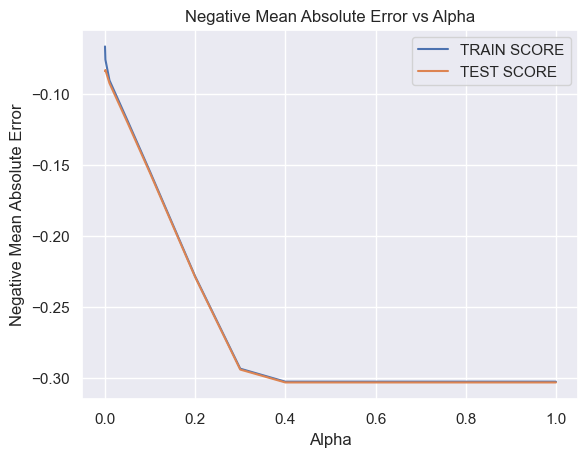

In [768]:
out['param_alpha'] = out['param_alpha'].astype('float32')
plt.plot(out['param_alpha'], out['mean_train_score'])
plt.plot(out['param_alpha'], out['mean_test_score'])
plt.title('Negative Mean Absolute Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['TRAIN SCORE', 'TEST SCORE'], loc='upper right')
plt.show()

**Negative Mean Absolute Error is low. Alpha = 0.4**
**A lower value of alpha has to be used to balance the trade-off b/w Bias-Variance**

In [769]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00698318,  0.01385863,  0.01530092,  0.11219857,  0.04956005,
        0.        ,  0.03451586,  0.        ,  0.04155321,  0.        ,
        0.        , -0.        ,  0.12480705,  0.00976136,  0.        ,
        0.        ,  0.        , -0.        , -0.00805575,  0.02372561,
        0.033997  ,  0.00962824,  0.        ,  0.        ,  0.        ,
        0.00541322,  0.        , -0.0953824 ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

**Lasso bring the coefficients of insignifact features to zero**

In [770]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.003),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.014),
 ('LotArea', 0.015),
 ('OverallQual', 0.112),
 ('OverallCond', 0.05),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.035),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.125),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.024),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('PropAge', -0.095),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0)

**Applying Lasso Regression**

In [771]:
alpha=0.01
lm = Lasso(alpha=alpha)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8854624158407248
0.8894603158029368


In [772]:
print(f'Root Mean Square Error : {np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

Root Mean Square Error : 0.12573595366706636


**Creating a Dataframe to hold coefficients from Lasso**

In [773]:
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.003
1   MSSubClass  -0.007
2  LotFrontage   0.014
3      LotArea   0.015
4  OverallQual   0.112

**Sorting coefficeints in ascending order**

In [774]:
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                 constant  12.003
13               GrLivArea   0.125
4              OverallQual   0.112
5              OverallCond   0.050
9              TotalBsmtSF   0.042
..                     ...     ...
210  SaleCondition_Partial   0.000
173         KitchenQual_TA  -0.007
1               MSSubClass  -0.007
19            KitchenAbvGr  -0.008
28                 PropAge  -0.095

[211 rows x 2 columns]

**Selecting Variables having coeffients as non-zero**

In [775]:
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0          constant  12.003
13        GrLivArea   0.125
4       OverallQual   0.112
5       OverallCond   0.050
9       TotalBsmtSF   0.042
7        BsmtFinSF1   0.035
21       GarageArea   0.034
20       Fireplaces   0.024
3           LotArea   0.015
2       LotFrontage   0.014
14     BsmtFullBath   0.010
22       WoodDeckSF   0.010
26      ScreenPorch   0.005
173  KitchenQual_TA  -0.007
1        MSSubClass  -0.007
19     KitchenAbvGr  -0.008
28          PropAge  -0.095

In [776]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'PropAge']


In [777]:
X_train_lasso = x_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
11     1.923409     2.241710    -0.513939     0.345478    1.267298   
1070  -0.932170    -0.764271    -0.513939     0.030191   -0.857140   
513   -0.860557    -0.012775    -0.513939     0.119563    0.077613   
467    0.401627    -0.764271     1.258264    -0.764234   -0.734395   
993    0.079368    -0.012775    -0.513939    -0.709617    0.455291   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
11      1.323938    2.231812  0.154684     0.746261      1.131973   
1070    0.360916   -0.918240 -0.020017     0.130905      1.131973   
513    -0.223442   -0.918240 -0.115156     0.083570     -0.816345   
467    -0.106571    2.231812 -0.086269     0.462250     -0.816345   
993    -1.008820   -0.918240 -0.148775    -0.058435     -0.816345   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
11                   1    -0.351334  2.754667    -0.268919    0.485675  
1070                 0    -0.368801 -0.990631     3.351363   -0.758474  
513                  1    -0.718144 -0.990631    -0.268919    0.257158  
467                  0    -0.718144 -0.990631    -0.268919    0.663411  
993                  1    -0.106794  0.882018    -0.268919   -0.758474

In [778]:
X_test_lasso = x_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
461   -0.813247     0.620334     3.325664    -1.205047    0.530538   
335    0.616745    -0.825989     0.435637     1.075768    0.299231   
200   -0.843999    -1.549150    -0.527705     0.157612   -0.138775   
214   -0.248718    -0.102827     1.398980    -0.891708   -0.832694   
1003   0.383905    -0.825989     0.435637     1.515413    0.294310   

      BsmtFinSF1  Fireplaces    LotArea  LotFrontage  BsmtFullBath  \
461    -0.211663   -0.988037  -0.339155    -0.495702      1.073876   
335     1.881258    2.151725  17.009026     0.729276      2.969732   
200    -1.026482   -0.988037  -0.190859     0.484280     -0.821980   
214    -0.146477   -0.988037   0.068493    -0.005711     -0.821980   
1003   -1.026482   -0.988037   0.134598     0.484280     -0.821980   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
461                  1    -0.747921 -1.099305     -0.27671    1.165362  
335                  0    -0.747921  0.802316     -0.27671    4.227488  
200                  1     0.135073  0.802316     -0.27671    0.248203  
214                  0    -0.251236 -1.099305     -0.27671   -0.728127  
1003                 0    -0.747921  0.802316     -0.27671   -0.728127

# Ridge Regression

In [779]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [780]:
out = pd.DataFrame(model_cv.cv_results_)
out = out[out['param_alpha']<=5]
out.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.013095      0.006783         0.001856        0.000515      0.0001   
1       0.002972      0.000142         0.000985        0.000007       0.001   
2       0.024298      0.035250         0.001716        0.000921        0.01   
3       0.002920      0.000125         0.001067        0.000179        0.05   
4       0.011193      0.014944         0.001301        0.000536         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098827          -0.080586          -0.093923   
1   {'alpha': 0.001}          -0.098810          -0.080580          -0.093891   
2    {'alpha': 0.01}          -0.098639          -0.080523          -0.093591   
3    {'alpha': 0.05}          -0.097945          -0.080315          -0.092583   
4     {'alpha': 0.1}          -0.097200          -0.080133          -0.091735   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.093385          -0.081908        -0.089726        0.007190   
1          -0.093357          -0.081877        -0.089703        0.007188   
2          -0.093089          -0.081615        -0.089491        0.007154   
3          -0.092083          -0.081129        -0.088811        0.006922   
4          -0.091160          -0.080831        -0.088212        0.006658   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.063890           -0.066811   
1               25           -0.063891           -0.066811   
2               24           -0.063904           -0.066811   
3               23           -0.063979           -0.066830   
4               22           -0.064088           -0.066874   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.062901           -0.064702           -0.065821   
1           -0.062903           -0.064704           -0.065823   
2           -0.062931           -0.064715           -0.065846   
3           -0.063098           -0.064761           -0.065935   
4           -0.063300           -0.064818           -0.066043   

   mean_train_score  std_train_score  
0         -0.064825         0.001380  
1         -0.064826         0.001380  
2         -0.064842         0.001374  
3         -0.064921         0.001335  
4         -0.065025         0.001292

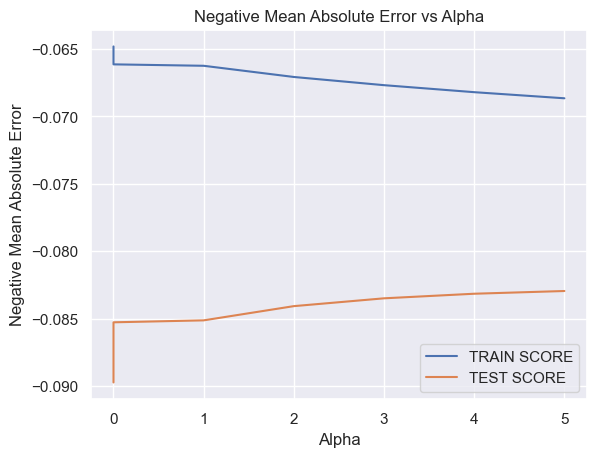

In [781]:
out['param_alpha'] = out['param_alpha'].astype('int32')
plt.plot(out['param_alpha'], out['mean_train_score'])
plt.plot(out['param_alpha'], out['mean_test_score'])
plt.title('Negative Mean Absolute Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['TRAIN SCORE', 'TEST SCORE'], loc='lower right')
plt.show()

**Applying Ridge Regression**

**Negative Mean Absolute Error stabilises at Alpha = 2**

In [782]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01661814,  0.00879344,  0.02534461,  0.06457657,  0.05124942,
       -0.00169877,  0.0304906 ,  0.00747482,  0.03650081,  0.03991915,
        0.04767425,  0.00523671,  0.07595503,  0.01170416, -0.00092158,
        0.00892371,  0.01249545,  0.0003776 , -0.00534099,  0.00350875,
        0.02078896,  0.01348507, -0.0010637 ,  0.01230575,  0.00491464,
        0.0141215 ,  0.00971184, -0.0702245 ,  0.14857807,  0.10523788,
        0.12502615,  0.09704995,  0.00219378, -0.0208621 ,  0.00027408,
        0.01235864, -0.02072982,  0.00302972,  0.01744635, -0.02148039,
       -0.05117096, -0.02397809,  0.01020923, -0.03899013, -0.0150698 ,
       -0.02340803,  0.00931668,  0.03728476, -0.00759928,  0.11394039,
       -0.05593223, -0.00971649, -0.08597375, -0.11266515, -0.04195278,
       -0.01867322,  0.04765164, -0.02093394,  0.03560318,  0.04414944,
       -0.0527455 , -0.04663915, -0.00821161,  0.00358752,  0.02349391,
        0.09259274, -0.00371216,  0.03744706,  0.01443113,  0.06

In [783]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.739),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.065),
 ('OverallCond', 0.051),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.007),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('PropAge', -0.07),
 ('MSZoning_FV', 0.149),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.021),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 ('LotCo

In [784]:
lm = Ridge(alpha=2)
lm.fit(x_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9364594823911132
0.9077597079466583


**Model Performance is better than Lasso**

In [785]:
print(f'Root Mean Square Error : {np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

Root Mean Square Error : 0.11485785595060985


**Creating a Dataframe to hold coefficients from Ridge**

In [786]:
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                 constant  11.739
29             MSZoning_FV   0.149
31             MSZoning_RL   0.125
50    Neighborhood_Crawfor   0.114
30             MSZoning_RH   0.105
32             MSZoning_RM   0.097
210  SaleCondition_Partial   0.097
66    Neighborhood_StoneBr   0.093
13               GrLivArea   0.076
209   SaleCondition_Normal   0.074
95     Exterior1st_BrkFace   0.069
70         Condition1_Norm   0.067
136       Foundation_Stone   0.067
4              OverallQual   0.065
206  SaleCondition_AdjLand   0.061
200         SaleType_ConLD   0.058
103     Exterior1st_Stucco   0.055
198           SaleType_CWD   0.054
124       MasVnrType_Stone   0.052
5              OverallCond   0.051

**Sorting coefficients in ascending order**

In [787]:
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.739
29            MSZoning_FV   0.149
31            MSZoning_RL   0.125
50   Neighborhood_Crawfor   0.114
30            MSZoning_RH   0.105
..                    ...     ...
173        KitchenQual_TA  -0.080
53    Neighborhood_IDOTRR  -0.086
94    Exterior1st_BrkComm  -0.096
83      HouseStyle_2.5Fin  -0.100
54   Neighborhood_MeadowV  -0.113

[211 rows x 2 columns]

**Selecting Variables having coeffients as non-zero**

In [788]:
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.739
29            MSZoning_FV   0.149
31            MSZoning_RL   0.125
50   Neighborhood_Crawfor   0.114
30            MSZoning_RH   0.105
..                    ...     ...
173        KitchenQual_TA  -0.080
53    Neighborhood_IDOTRR  -0.086
94    Exterior1st_BrkComm  -0.096
83      HouseStyle_2.5Fin  -0.100
54   Neighborhood_MeadowV  -0.113

[204 rows x 2 columns]

# Observation

**Model performance of Ridge Regression is better in terms of R2 Values of Train and Test**
****
**Lasso is most preferred here since it brings and assigns a zero value to insignifacnt features, therefore enabling us to choose the predictive varaibles**
****
**As a best practise it is always advisable to use simple and robust model**

# Below are the final features that should be selected for predicting price of house

In [789]:
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

Variable   Coeff
C          constant  12.003
x1        GrLivArea   0.125
x2      OverallQual   0.112
x3      OverallCond   0.050
x4      TotalBsmtSF   0.042
x5       BsmtFinSF1   0.035
x6       GarageArea   0.034
x7       Fireplaces   0.024
x8          LotArea   0.015
x9      LotFrontage   0.014
x10    BsmtFullBath   0.010
x11      WoodDeckSF   0.010
x12     ScreenPorch   0.005
x13  KitchenQual_TA  -0.007
x14      MSSubClass  -0.007
x15    KitchenAbvGr  -0.008
x16         PropAge  -0.095

**Formulating Equation**
****
**Log(Y) = C + 0.125(x1) + 0.112(x2) +  0.050(x3) + 0.042(x4) + 0.035(x5) + 0.034(x6) + 0.024(x7) +  0.015(x8) + 0.014(x9) + 0.010(x10) + 0.010(x11) + 0.005(x12) - 0.007(x13) - 0.007(x14) - 0.008(x15) - 0.095(x16) + Error term(RSS + alpha * (sum of absolute value of coefficients)**

# Inference Drawn

**Features Like GrLivArea, OverallQual, OverallCond, TotalBsmtSF, GarageArea has higher values of positive coeeficients. This suggests a higher sale value**

**Features Like PropAge, MSSubClass has higher values of negative coeeficients. This suggests a lower sale value**

**Correct time to buy a property is when its market value is lower than the Predicted Sale Price**